In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# file_path = "/data/user/tvaneede/GlobalFit/EventGenerator/hdf/test_1000files.hdf5"
# file_path = "/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/NoDeepCore/22043_DoubleCascades.hdf5"
# file_path = "/data/user/tvaneede/datasets/taupede/SnowStorm/NoDeepCore/hdf_files/RecowithBfr/Baseline/22049/22049_0000000-0000999_DoubleCascades.hdf5"
# file_path = "/data/user/tvaneede/datasets/taupede/MuonGun/NoDeepCore/hdf_files/RecowithBfr/21315_DoubleCascades_0011000-0011999.hdf5"
file_path = "/data/user/tvaneede/GlobalFit/EventGenerator/hdf/v0/RecowithBfr/Baseline/22085/22085_0000000-0000999_DoubleCascades.hdf5"
plotting_path = "/data/user/tvaneede/GlobalFit/EventGenerator/notebooks/output/"

In [3]:
import h5py

# Open the HDF5 file in read mode
with h5py.File(file_path, "r") as f:
    # List all keys (groups and datasets)
    keys = list(f.keys())
    print(keys)

['ConventionalAtmosphericPassingFractions', 'DeepCore_Charge', 'FinalEventClass', 'FinalTopology', 'HESEEventclass', 'HESEMillipedeFitDepositedEnergy', 'HESEMillipedeFitFitParams', 'HESEMillipedeFitTruncatedDepositedEnergy', 'HESEMonopodFit_x', 'HESEMonopodFit_y', 'HESEMonopodFit_z', 'HESETaupedeFit', 'HESETaupedeFit1', 'HESETaupedeFit1_x', 'HESETaupedeFit1_y', 'HESETaupedeFit1_z', 'HESETaupedeFit2', 'HESETaupedeFit2_x', 'HESETaupedeFit2_y', 'HESETaupedeFit2_z', 'HESETaupedeFitFitParams', 'I3EventHeader', 'I3MCWeightDict', 'MCInteractionDepth', 'MCInteractionEventclass', 'MCReconstructionEventclass', 'MyEgeneratorOutputFrameKey', 'PromptAtmosphericPassingFractions', 'RecoAzimuth', 'RecoDirection', 'RecoEConfinement', 'RecoERatio', 'RecoETot', 'RecoEnergy', 'RecoL', 'RecoLbyE', 'RecoLength', 'RecoLogE1', 'RecoLogE2', 'RecoLogETot', 'RecoLogL', 'RecoParticle', 'RecoZenith', 'TotalCharge', 'TotalWeight', 'TotalWeightPol', 'TrueAzimuth', 'TrueE1', 'TrueE2', 'TrueETot', 'TrueL', 'TrueLength

In [5]:
# ### HDF Keys ###
# hdfkeys = []
# hdfkeys += ['TaupedeFitParticles','TaupedeFit','TaupedeFitFitParams','SnowstormParameterDict']


hdfkeys = []
hdfkeys += ['MCInteractionEventclass','TrueL','TrueETot','TrueE1','TrueE2','TrueZenith', 'TrueAzimuth']
hdfkeys += ['RecoLogL', 'RecoERatio', 'RecoEConfinement', 'RecoLogE1', 'RecoLogE2', 'RecoLogETot', 'RecoZenith', 'RecoAzimuth',"RecoL"]
hdfkeys += ['RecoParticle']
hdfkeys += ['HESETaupedeFit1','HESETaupedeFit2'] # , 'HESETaupedeFitFitParams'
hdfkeys += ['MyEgeneratorOutputFrameKey']
hdfkeys += ['HESEEventclass', "FinalTopology"]
hdfkeys += ['RecoETot']
hdfkeys += ['FinalTopology','DeepCore_Charge','TotalCharge']
hdfkeys += ['I3MCWeightDict', 'MCInteractionEventclass']
# hdfkeys += ['HESEMonopodFit_x', 'HESEMonopodFit_y', 'HESEMonopodFit_z']
# hdfkeys += ['HESETaupedeFit1_x', 'HESETaupedeFit1_y', 'HESETaupedeFit1_z']
# hdfkeys += ['HESETaupedeFit2_x', 'HESETaupedeFit2_y', 'HESETaupedeFit2_z']



# dfs = [pd.read_hdf(file_path, key=key) for key in hdfkeys]  # Read each dataset into a DataFrame
dfs = {key: pd.read_hdf(file_path, key=key) for key in hdfkeys}

df_combined = pd.concat(dfs, axis=1)  # Combine them column-wise based on the index

# df_combined

# print(df_combined.keys())
# df_combined["I3MCWeightDict"]['InteractionType']
df_combined["MyEgeneratorOutputFrameKey"]

# dfs[4]["valu"]


# print(df_combined['HESEEventclass']["value"], df_combined['FinalTopology']["value"])

,Run,Event,SubEvent,SubEventStream,exists,cascade_azimuth,cascade_cascade_00001_distance,cascade_cascade_00001_energy,cascade_energy,cascade_time,...,cascade_z,cascade_zenith,loss_reco,loss_seed,minimization_success,runtime_reco,runtime_reco_MonopodSeed_length100,runtime_reco_MonopodSeed_length200,runtime_reco_MonopodSeed_length50,runtime_reco_TaupedeSeed
0,2208500499,661,0,0,1,5.798667,3.444087,27509.592652,50912.415139,9714.940834,...,-312.791668,0.648438,3232.584473,4334.135742,0.0,0.000165,2.919572,3.115701,4.814813,24.859388
1,2208500499,805,0,0,1,3.557385,54.941045,6154.841462,50866.266933,9682.167695,...,168.931952,1.797814,-3528.863037,-971.036133,0.0,0.000131,2.689023,5.584805,5.110298,3.286824
2,2208500499,1696,0,0,1,0.356553,-2.246226,27054.050084,65157.506002,9605.700898,...,-317.395541,0.284817,8716.682617,10826.982422,0.0,0.000151,3.160776,5.465679,3.554821,2.556609
3,2208500499,1906,0,0,1,1.905771,88.272120,23572.565654,556134.577603,9820.938062,...,304.236638,1.009032,-48413.203125,-24552.794922,0.0,0.000119,3.985047,3.861808,8.659007,3.552454
4,2208500499,3085,0,0,1,9.836952,58.962067,62078.260317,67633.088933,9777.389995,...,-32.382526,1.278825,-11999.533203,-10592.740234,0.0,0.000113,7.505948,3.522406,3.624725,3.389130
5,2208500499,4046,0,0,1,5.645120,3.114383,12499.894369,63798.518545,9741.229560,...,-252.555227,0.488132,1934.661865,6544.774414,0.0,0.000116,3.130480,3.444983,2.861148,2.562288
6,2208500499,4221,0,0,1,4.871939,54.665433,14996.182808,106856.765585,9726.300460,...,108.140037,1.110745,-11887.428711,-10398.360352,0.0,0.000127,4.518278,3.549193,6.094375,3.039953
7,2208500499,4337,0,0,1,7.580543,48.046802,25900.212254,63751.802459,9679.878299,...,271.961090,-0.863265,-2163.039062,-432.301758,0.0,0.000117,4.133049,3.671709,3.387729,2.815547
8,2208500499,4650,0,0,1,1.347574,40.558268,19397.108391,47364.199768,9649.524639,...,27.889694,1.233668,-757.247803,697.585876,0.0,0.000119,2.605263,3.395736,5.011173,3.949109
9,2208500499,5175,0,0,1,-0.033996,15.580376,77125.985357,134401.452430,9639.077923,...,128.943755,0.905812,-11712.761719,-7187.560059,0.0,0.000104,3.989446,5.311198,3.465209,2.876859


In [59]:
print("what is what")
print(10*"-", "HESETaupedeFitFitParams")

print(10*"-", "HESETaupedeFit1")
print( "Event",df_combined["HESETaupedeFit1"]['Event'].iloc[0] )
print( "length",df_combined["HESETaupedeFit1"]['length'].iloc[0] )
print( "zenith",df_combined["HESETaupedeFit1"]['zenith'].iloc[0] )
print( "x",df_combined["HESETaupedeFit1"]['x'].iloc[0] )
print(10*"-", "RecoParticle")
print( "Event",df_combined["RecoParticle"]['Event'].iloc[0] )
print( "length",df_combined["RecoParticle"]['length'].iloc[0] )
print( "zenith",df_combined["RecoParticle"]['zenith'].iloc[0] )
print( "x",df_combined["RecoParticle"]['x'].iloc[0] )
print(10*"-", "Var")
print( "10**RecoLogL",10**df_combined["RecoLogL"]['value'].iloc[0] )
print( "RecoL",df_combined["RecoL"]['value'].iloc[0] )
print( "RecoZenith",df_combined["RecoZenith"]['value'].iloc[0] )




what is what
---------- HESETaupedeFitFitParams
---------- HESETaupedeFit1
Event 3087
length 71.79329848293173
zenith 0.41472839424730257
x 42.5645702959136
---------- RecoParticle
Event 3087
length 71.79329848293173
zenith 0.41472839424730257
x 42.5645702959136
---------- Var
10**RecoLogL 71.79329848293172
RecoL 71.79329848293173
RecoZenith 0.41472839424730257


In [17]:
selections = {
    "RecoETot>60TeV" : ( df_combined['RecoETot']["value"] > 60000 ),
    "TrueDoubleCascade" : (df_combined["MCInteractionEventclass"]['value'] == 2) ,
    "TrueSingleCascade" : (df_combined["MCInteractionEventclass"]['value'] == 1) ,
    "HESEDoubleCascade" : ( df_combined['FinalTopology']["value"] == 2.0 ),
    "HESEDoubleCascade TrueDouble" :  ( df_combined['MCInteractionEventclass']["value"] == 2.0 ) & ( df_combined['FinalTopology']["value"] == 2.0 ),
    "HESEDoubleCascade TrueSingle" :  ( df_combined['MCInteractionEventclass']["value"] == 1.0 ) & ( df_combined['FinalTopology']["value"] == 2.0 ),

    # energy
    "TrueETot>0" : ( df_combined['TrueETot']["value"] > 0 ),

}

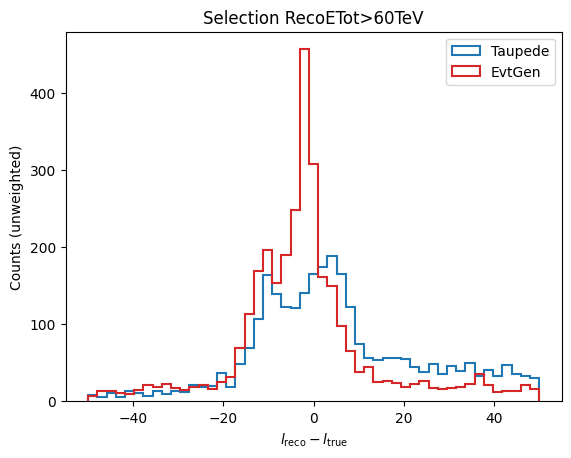

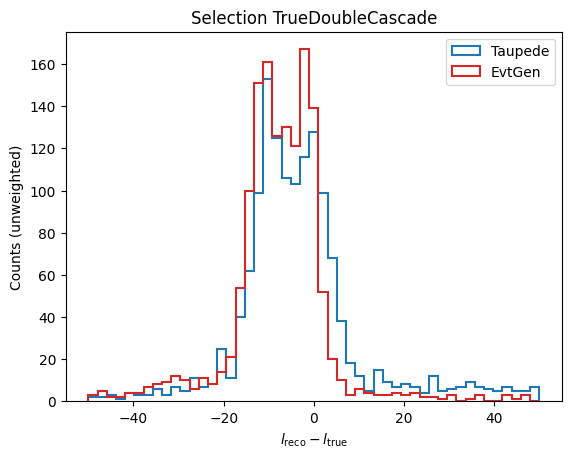

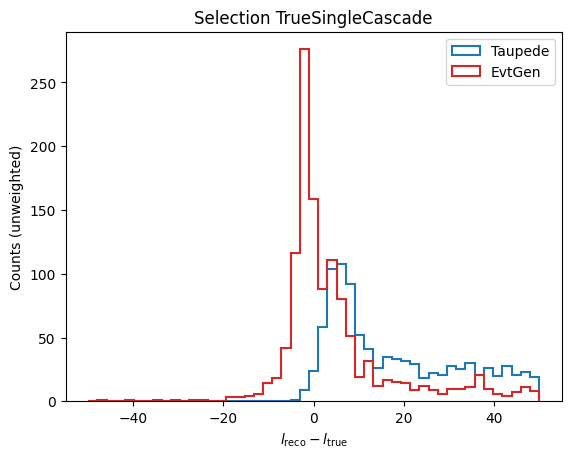

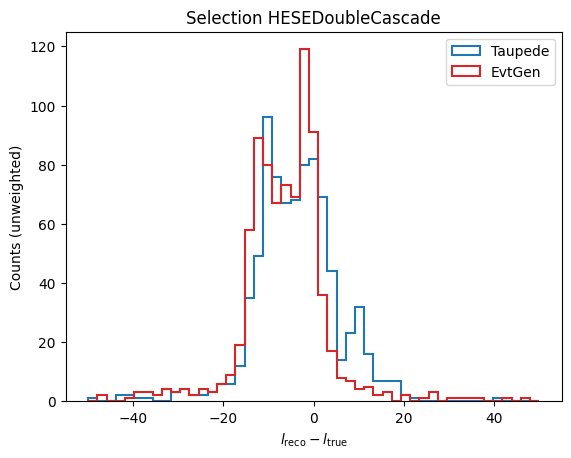

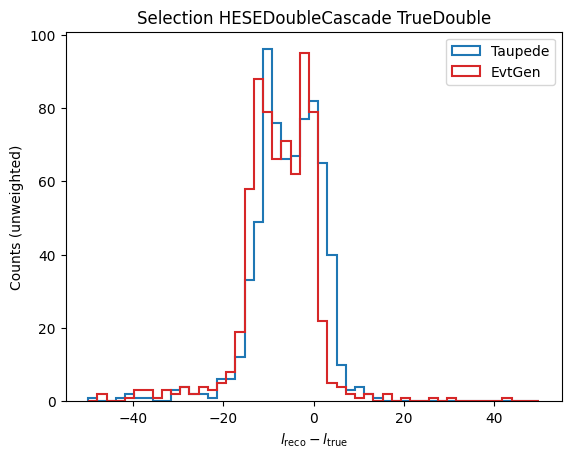

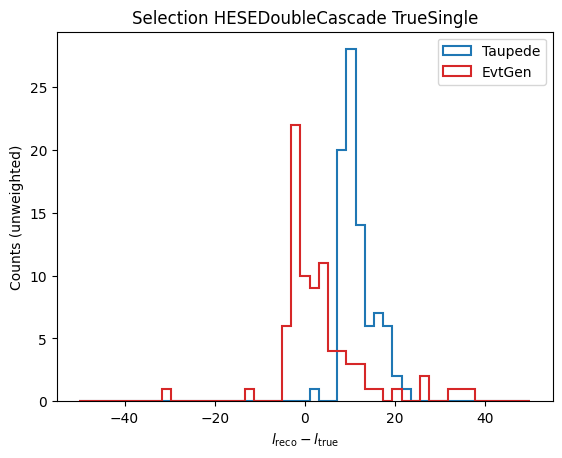

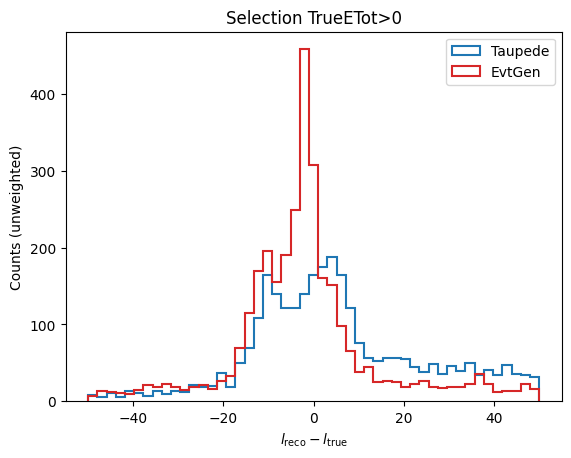

In [18]:
def plot_length_resolution( selection, bins, name ):

    fig, ax = plt.subplots()

    ax.hist( df_combined["HESETaupedeFit1"]["length"][selection] - df_combined["TrueL"]["value"][selection], bins=bins, histtype='step', color='C0', linewidth=1.5, label="Taupede")
    ax.hist( df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_distance"][selection] - df_combined["TrueL"]["value"][selection] , bins=bins, histtype='step', color='C3', linewidth=1.5, label="EvtGen")

    ax.set_xlabel(r"$l_{\rm reco} - l_{\rm true}$")
    ax.set_ylabel(r"Counts (unweighted)")
    ax.set_title(f"Selection {name}")

    ax.legend()

    plt.savefig( f"{plotting_path}/length_resolution_selection-{name}.png" )

    plt.show()


bins = np.linspace(-50, 50, 50)

for selection in selections:
    plot_length_resolution( selections[selection], bins, selection )


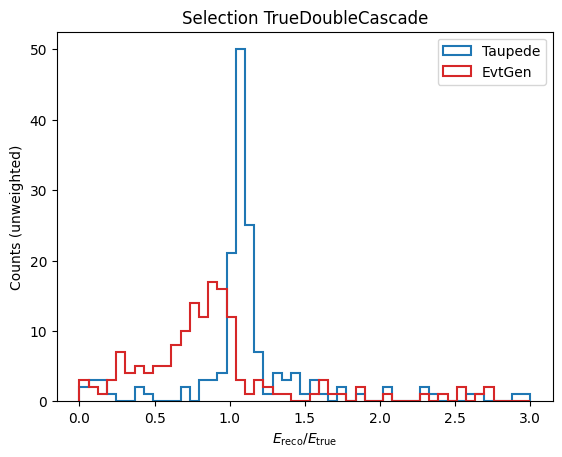

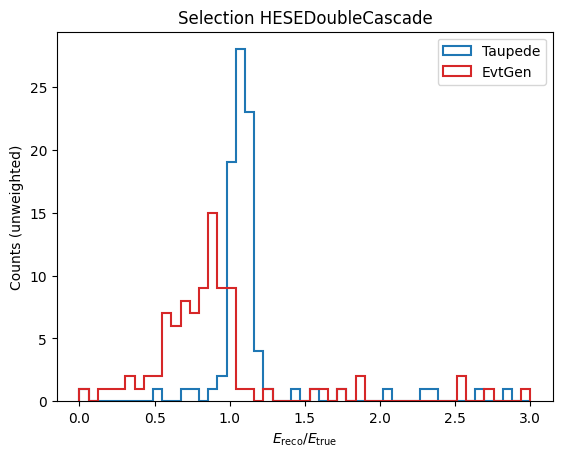

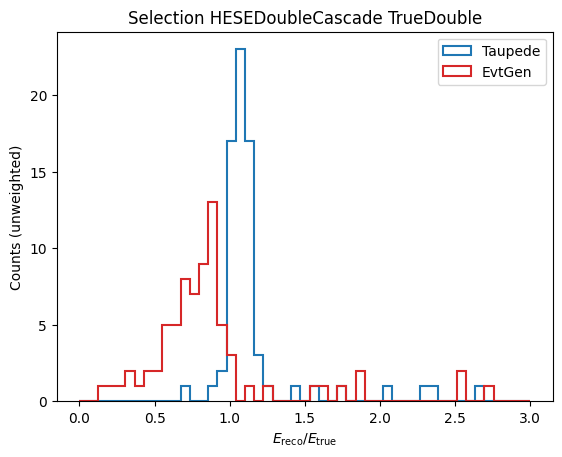

In [22]:
def plot_energy_resolution( selection, bins, name ):

    fig, ax = plt.subplots()

    ax.hist( 10**df_combined["RecoLogETot"]["value"][selection] / df_combined["TrueETot"]["value"][selection], bins=bins, histtype='step', color='C0', linewidth=1.5, label="Taupede")
    ax.hist( (df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection])
             / df_combined["TrueETot"]["value"][selection] , bins=bins, histtype='step', color='C3', linewidth=1.5, label="EvtGen")

    ax.set_xlabel(r"$E_{\rm reco} / E_{\rm true}$")
    ax.set_ylabel(r"Counts (unweighted)")
    ax.set_title(f"Selection {name}")

    ax.legend()

    plt.savefig( f"{plotting_path}/total_energy_resolution_selection-{name}.png" )

    plt.show()


bins = np.linspace(0, 3, 50)

for selection in ["TrueDoubleCascade", "HESEDoubleCascade", "HESEDoubleCascade TrueDouble"]:
    plot_energy_resolution( selections[selection], bins, selection )


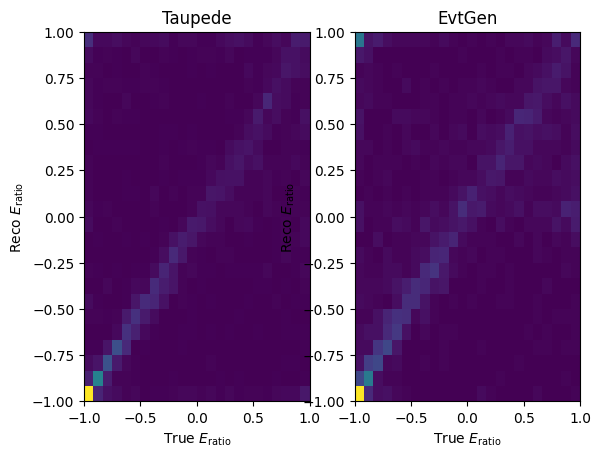

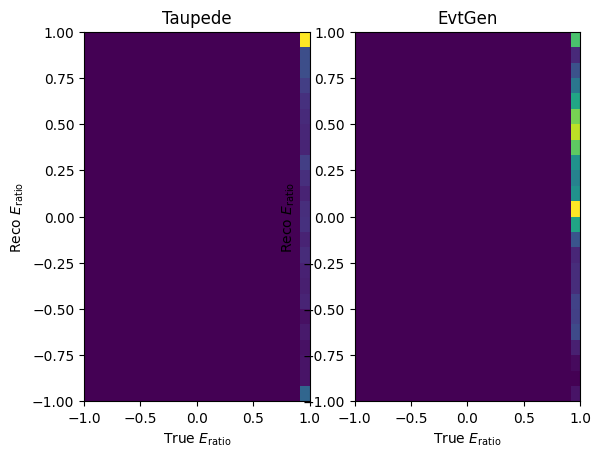

In [9]:
def plot_energy_asymmetry( selection, name ):

    fig, ax = plt.subplots(1,2)

    x_bins = np.linspace(-1, 1, 25)
    y_bins = np.linspace(-1, 1, 25)


    hist = ax[0].hist2d((df_combined["TrueE1"]["value"][selection] - df_combined["TrueE2"]["value"][selection])
                        /(df_combined["TrueE2"]["value"][selection] + df_combined["TrueE1"]["value"][selection]), 
                        df_combined["RecoERatio"]["value"][selection], 
                        bins=[x_bins, y_bins] )


    ax[0].set_xlabel(r"True $E_{\rm ratio}$")
    ax[0].set_ylabel(r"Reco $E_{\rm ratio}$")
    ax[0].set_title(f"Taupede")


    hist = ax[1].hist2d((df_combined["TrueE1"]["value"][selection] - df_combined["TrueE2"]["value"][selection])
                        /(df_combined["TrueE2"]["value"][selection] + df_combined["TrueE1"]["value"][selection]), 
                        (- df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection])
                        /(df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection]), 
                        bins=[x_bins, y_bins] )


    ax[1].set_xlabel(r"True $E_{\rm ratio}$")
    ax[1].set_ylabel(r"Reco $E_{\rm ratio}$")
    ax[1].set_title(f"EvtGen")

    plt.savefig( f"{plotting_path}/energy_asymmetry_selection-{name}.png" )


    plt.show()



name = "TrueDoubleCascade"
selection = selections[name]
plot_energy_asymmetry( selection=selection, name=name )

name = "TrueSingleCascade"
selection = selections[name]
plot_energy_asymmetry( selection=selection, name=name )



# for selection in ["TrueETot>0", "HESEDoubleCascadeSignal"]:
#     plot_energy_resolution( selections[selection], bins, selection )




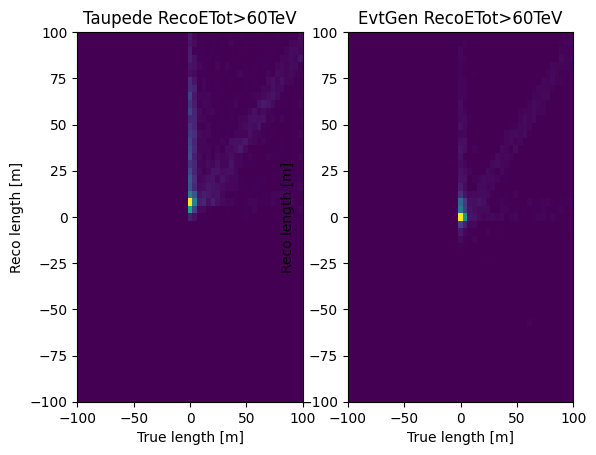

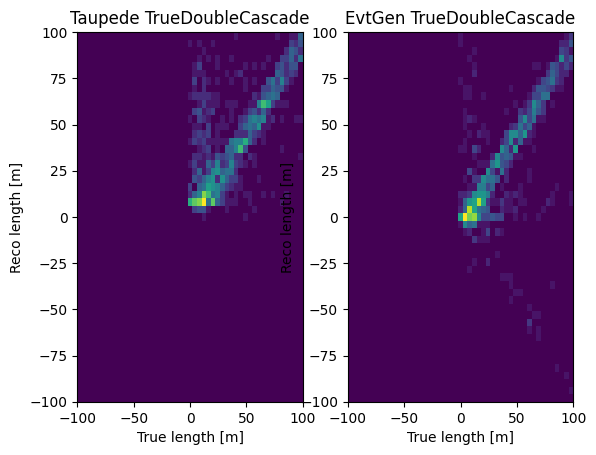

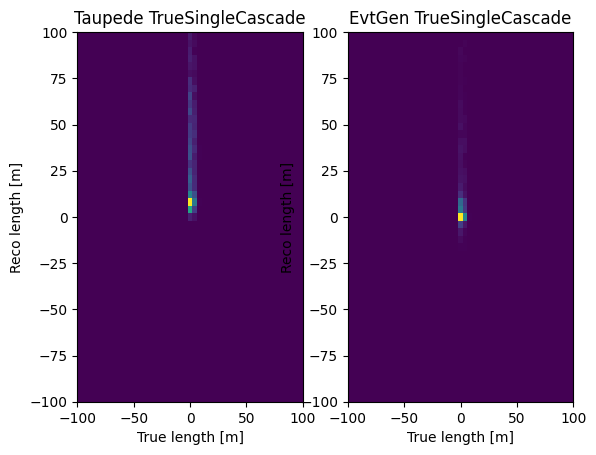

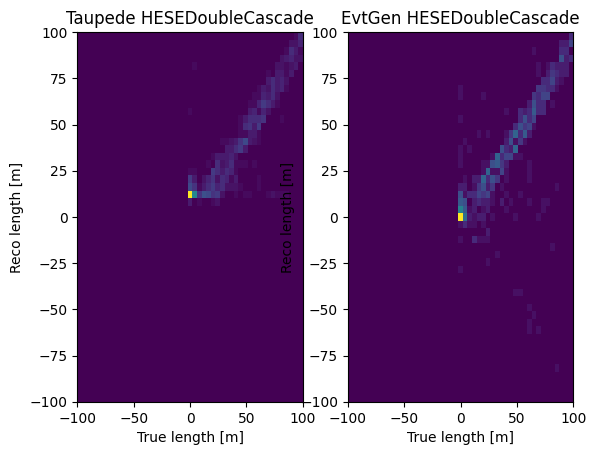

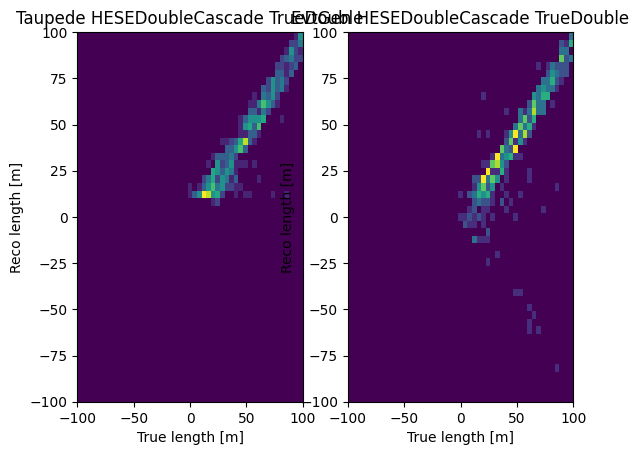

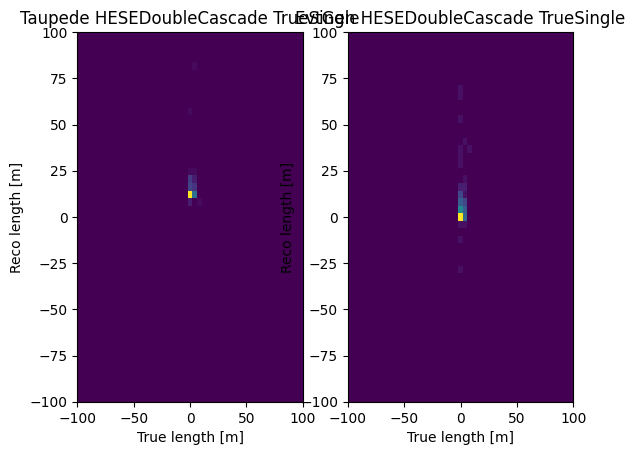

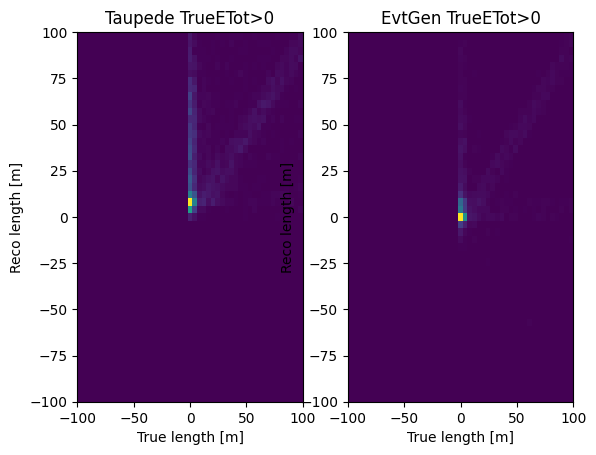

In [24]:
def plot_reco_length_true_length( selection, name ):

    fig, ax = plt.subplots(1,2)

    x_bins = np.linspace(-100, 100, 50)
    y_bins = np.linspace(-100, 100, 50)

    hist = ax[0].hist2d(df_combined["TrueL"]["value"][selection], 
                        df_combined["HESETaupedeFit1"]["length"][selection], 
                        bins=[x_bins, y_bins] )


    ax[0].set_xlabel(r"True length [m]")
    ax[0].set_ylabel(r"Reco length [m]")
    ax[0].set_title(f"Taupede {name}")


    hist = ax[1].hist2d(df_combined["TrueL"]["value"][selection], 
                        df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_distance"][selection], 
                        bins=[x_bins, y_bins] )


    ax[1].set_xlabel(r"True length [m]")
    ax[1].set_ylabel(r"Reco length [m]")
    ax[1].set_title(f"EvtGen {name}")

    # plt.savefig( f"{plotting_path}/reco_length_true_length_selection-{name}.png" )

    plt.show()




for selection in selections:
    plot_reco_length_true_length( selections[selection], selection )


